<a href="https://colab.research.google.com/github/milenar18/Topicos_Aplicada_II-Tutorial_2/blob/main/Exercise_44.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 18.2 MB/s eta 0:00:00


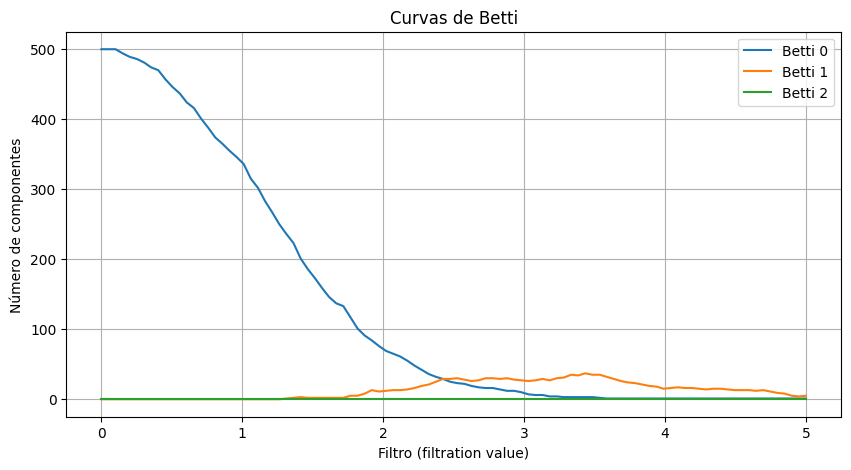

In [1]:
!pip install gudhi
import numpy as np
import matplotlib.pyplot as plt
import gudhi

# Função para gerar curva de Betti
def compute_betti_curve(simplex_tree, resolution=100):
    filtration_vals = np.linspace(0, max(f[1] for f in simplex_tree.get_filtration()), resolution)
    betti_curves = {0: [], 1: [], 2: []}

    # Computa a persistência uma vez
    simplex_tree.compute_persistence()

    for f in filtration_vals:
        for dim in [0, 1, 2]:
            betti = sum(1 for birth, death in simplex_tree.persistence_intervals_in_dimension(dim)
                        if birth <= f < death)
            betti_curves[dim].append(betti)

    return filtration_vals, betti_curves

# Geração de dados de exemplo
from sklearn.datasets import make_swiss_roll
X, _ = make_swiss_roll(n_samples=500, noise=0.05)

# Construção da complexidade de Rips
rips = gudhi.RipsComplex(points=X, max_edge_length=5.0)
simplex_tree = rips.create_simplex_tree(max_dimension=2)

# Calcula curvas de Betti
I, betti_curves = compute_betti_curve(simplex_tree)

# Plotando as curvas de Betti
plt.figure(figsize=(10, 5))
for dim in betti_curves:
    plt.plot(I, betti_curves[dim], label=f"Betti {dim}")
plt.title("Curvas de Betti")
plt.xlabel("Filtro (filtration value)")
plt.ylabel("Número de componentes")
plt.legend()
plt.grid(True)
plt.show()